In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pow, sin, pi, log


## 大気透過率 $P$ と 直達日射量 $J_{dn}$


大気透明率$P$とすると、直達日射量$J_{dn}$ [W/m<sup>2</sup>]は **ブーガ(Bouguer) の式**により求めることができる。

$ J_{dn} = J_0 P^{\frac{1}{sin h}}$


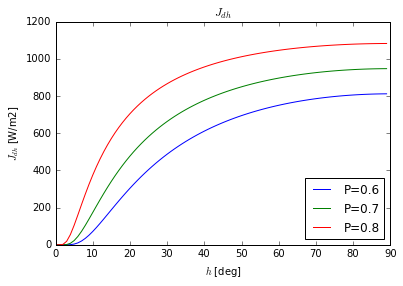

In [2]:
J0 = 1353.0 #太陽定数
eps = 0.000001   #安定化定数
plt.title('$J_{dh}$')
for P in [0.6, 0.7, 0.8]:
    plt.plot(range(90), [J0 * pow(P, 1.0/(eps+sin(h * pi/180))) for h in range(90)], label='P={0}'.format(P))
plt.ylabel("$J_{dh}$ [W/m2]")
plt.xlabel("$h$ [deg]")
plt.legend(loc="lower right")

## 大気透過率 $P$ と 天空日射量 $J_{sh}$


大気透明率$P$とすると、天空日射量$J_{sh}$ [W/m<sup>2</sup>]は **ベルラーゲ(Berlarge) の式**により求めることができる。

$ J_{sh} = \frac{1}{2} J_0 sin h \frac{1 - P^{\frac{1}{sin h}}}{1 - 1.4 ln P}$


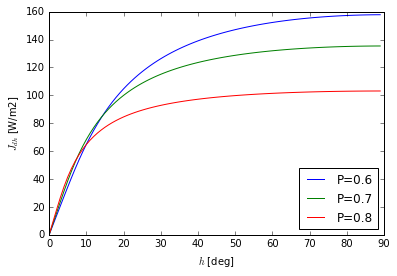

In [3]:
J0 = 1353.0 #太陽定数
eps = 0.000001   #安定化定数
for P in [0.6, 0.7, 0.8]:
    plt.plot(range(90), [0.5 * J0 * sin(h * pi/180) * (1.0-pow(P, 1.0/(eps+sin(h * pi/180))))/(1.0 - 1.4 * log(P)) for h in range(90)], label='P={0}'.format(P))
plt.ylabel("$J_{dh}$ [W/m2]")
plt.xlabel("$h$ [deg]")
plt.legend(loc="lower right")

## 大気透過率$P$ と直散分離

水平面全日射量 $J_h$が与えられるとき、これを直達日射量$J_{dh}$と天空日射量$J_{sh}$に分離する問題を直散分離問題という。

$J_h = J_{dh} + J_{sh}$

すなわち、ブーガの式およびベルラーゲの式から

$J_h = J_0 P^{\frac{1}{sin h}} + \frac{1}{2} J_0 sin h \frac{1 - P^{\frac{1}{sin h}}}{1 - 1.4 ln P}$

となる。

太陽高度$h$の条件のもと、太陽透過率$P$を収束計算することで求めることができる。




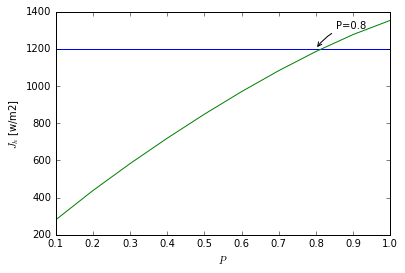

In [4]:
J0 = 1353.0 #太陽定数
eps = 0.000001   #安定化定数
h = 90
Jh = 1200

P_list = [(x+1.0)/10 for x in range(10)]
Jh_list = []

best_P = -1.0
best_diff = 100000
for P in P_list:
    _Jh = J0 * pow(P, 1.0/(eps+sin(h * pi/180))) 
    _Jh += 0.5 * J0 * sin(h * pi/180) * (1.0-pow(P, 1.0/(eps+sin(h * pi/180))))/(1.0 - 1.4 * log(P))
    Jh_list.append(_Jh)
    diff = abs(Jh - _Jh)
    if diff < best_diff:
        best_P = P
        best_diff = diff
        
plt.plot(P_list, [Jh for x in P_list]) 
plt.plot(P_list, Jh_list) 
plt.xlabel("$P$")
plt.ylabel("$J_h$ [w/m2]")
plt.annotate("P={}".format(best_P), xy=(best_P, Jh), xytext=(20, 20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))